# Entendendo o Compromisso entre Viés e Variância


## 1. Introdução
Neste notebook, exploraremos os conceitos de viés e variância, que são cruciais para entender o desempenho dos modelos de aprendizado de máquina. Demonstramos esses conceitos usando dados sintéticos, modelos de regressão linear simples e validação cruzada.

## 2. Importando Bibliotecas

In [1]:
# Biblioteca para operações matemáticas e arrays
import numpy as np
# Biblioteca para manipulação de dados
import pandas as pd
# Biblioteca para criação de gráficos
import matplotlib.pyplot as plt
# Regressão linear
from sklearn.linear_model import LinearRegression
# Criação de características polinomiais
from sklearn.preprocessing import PolynomialFeatures
# Cálculo do erro quadrático médio
from sklearn.metrics import mean_squared_error
# Divisão dos dados em treino e teste
from sklearn.model_selection import train_test_split
# Decomposição do erro em viés e variância
from mlxtend.evaluate import bias_variance_decomp

## 3. Criando Dados Sintéticos

In [2]:
# Função para gerar dados sintéticos
def generate_synthetic_data(n_samples=100, noise=1.0, random_seed=42):
    np.random.seed(random_seed)  # Define a semente para reprodutibilidade
    X = np.linspace(0, 100, n_samples).reshape(-1, 1)  # Cria um vetor de entrada

    # Função para gerar os dados
    true_function = -0.0001 * X**3 + 0.01 * X**2 + 0.1 * X + 1
    # Adiciona ruído aos dados
    y = true_function + np.random.normal(scale=noise, size=X.shape)
    return X, y, true_function  # Retorna os dados e a função

# Gera dados sintéticos
X, y, true_function = generate_synthetic_data(n_samples=100, noise=2.0)  # Define o número de amostras e o nível de ruído


In [3]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Modelo Simples de Regressão Linear

In [4]:
# Treinando um modelo simples de regressão linear
lin_reg = LinearRegression()  # Cria uma instância do modelo de regressão linear
lin_reg.fit(X_train, y_train)  # Ajusta o modelo aos dados de treinamento

# Predições
y_train_pred = lin_reg.predict(X_train)  # Faz previsões para os dados de treinamento
y_test_pred = lin_reg.predict(X_test)    # Faz previsões para os dados de teste


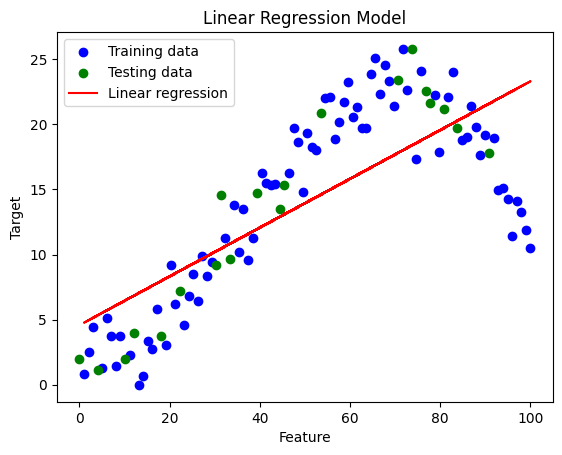

In [5]:
# Plotando os resultados

# Dados de treinamento
plt.scatter(X_train, y_train, color='blue', label='Training data')
# Dados de teste
plt.scatter(X_test, y_test, color='green', label='Testing data')
# Linha de regressão linear
plt.plot(X_train, y_train_pred, color='red', label='Linear regression')


plt.xlabel('Feature')  # Rótulo do eixo x
plt.ylabel('Target')   # Rótulo do eixo y
plt.title('Linear Regression Model')  # Título do gráfico
plt.legend()  # Adiciona uma legenda
plt.show()    # Exibe o gráfico


In [11]:
# Importar bibliotecas necessárias
from sklearn.metrics import mean_squared_error

# Calcular o erro quadrático médio para as previsões de treino e teste
train_error = mean_squared_error(y_train, y_train_pred)  # Calcular MSE para os dados de treino
test_error = mean_squared_error(y_test, y_test_pred)  # Calcular MSE para os dados de teste

# Imprimir os erros de treino e teste calculados
print(f'Erro de Treinamento: {train_error}')
print(f'Erro de Teste: {test_error}')


Erro de Treinamento: 17.35044251427849
Erro de Teste: 18.934445677401776


Neste caso, por que o MSE de treinamento é maior do que o MSE de teste?

**Resposta**: Porque o número de pontos é menor no conjunto de teste do que no conjunto de treinamento, o que gera um RSS e um MSE menores.

## 5. Modelos Polinomiais de Regressão

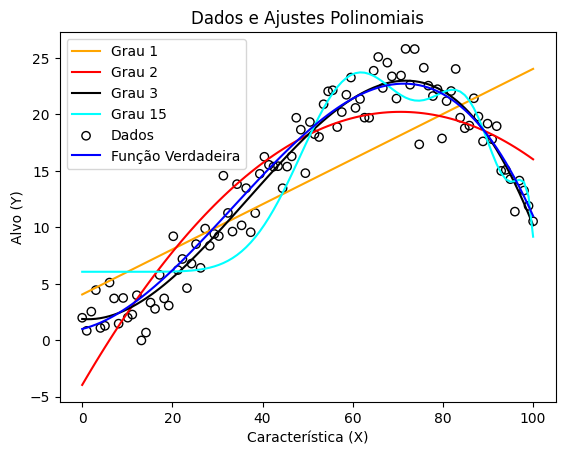

In [12]:
# Importar bibliotecas necessárias
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Graus de polinômios a serem ajustados e cores correspondentes
degrees = [1, 2, 3, 15]
colors = ['orange', 'red', 'black', 'cyan']
predictions = []

# Ajustar e plotar modelos polinomiais de diferentes graus
for degree, color in zip(degrees, colors):
   # Criar características polinomiais para o grau atual
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)  # Transformar as características de X
    model = LinearRegression()  # Instanciar o modelo de regressão linear
    model.fit(X_poly, y)  # Ajustar o modelo aos dados
    y_poly_pred = model.predict(X_poly)  # Fazer previsões nos dados transformados
    predictions.append(y_poly_pred)  # Armazenar as previsões
    # Plotar a linha de ajuste polinomial
    plt.plot(X, y_poly_pred, label=f'Grau {degree}', color=color)

# Plotar os dados sintéticos e a função verdadeira
# Plotar os dados originais
plt.scatter(X, y, facecolors='none', edgecolors='black', label='Dados')
# Plotar a função verdadeira
plt.plot(X, true_function, label='Função Verdadeira', color='blue')
plt.xlabel('Característica (X)')  # Rótulo do eixo X
plt.ylabel('Alvo (Y)')  # Rótulo do eixo Y
plt.title('Dados e Ajustes Polinomiais')  # Título do gráfico
plt.legend()  # Adicionar legenda
plt.show()  # Mostrar o gráfico


## 6. Troca entre Viés e Variância






O compromisso entre viés e variância é um conceito fundamental em aprendizado de máquina. Ele descreve a relação entre duas fontes de erro que afetam o desempenho de um modelo:

- **Viés**: Erro devido a suposições excessivamente simplistas no algoritmo de aprendizado. Um viés alto pode fazer com que o modelo perca as relações relevantes entre as características e os alvos (subajuste).
- **Variância**: Erro devido a complexidade excessiva no algoritmo de aprendizado. Uma variância alta pode fazer com que o modelo se ajuste ao ruído aleatório nos dados de treinamento (sobreajuste).

Para visualizar a troca entre viés e variância, podemos plotar os erros de treinamento e teste para modelos de complexidade variável.

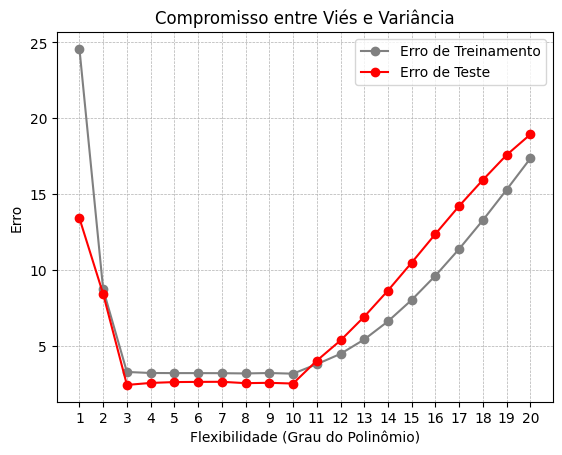

In [14]:
# Importar bibliotecas necessárias
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt

# Inicializar listas para armazenar erros e flexibilidade
train_errors = []
test_errors = []
flexibility = []
bias_errors = []
variance_errors = []

# Loop através dos graus polinomiais de 1 a 20
for degree in range(1, 21):
    # Criar características polinomiais para o grau atual
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    # Transformar as características de treino
    X_train_poly = poly_features.fit_transform(X_train)
     # Transformar as características de teste
    X_test_poly = poly_features.fit_transform(X_test)

    # Treinar o modelo de regressão linear
    model = LinearRegression()
    model.fit(X_train_poly, y_train)  # Ajustar o modelo aos dados de treino

    # Fazer previsões nos dados de treino e teste
    y_train_pred = model.predict(X_train_poly)  # Previsões para os dados de treino
    y_test_pred = model.predict(X_test_poly)  # Previsões para os dados de teste

    # Calcular e armazenar os erros quadráticos médios
    train_errors.append(mean_squared_error(y_train, y_train_pred))  # Erro de treino
    test_errors.append(mean_squared_error(y_test, y_test_pred))  # Erro de teste
    flexibility.append(degree)  # Armazenar o grau do polinômio

    # Calcular bias e variância usando mlxtend
    mse, bias, variance = bias_variance_decomp(model, X_train_poly, y_train.flatten(), X_test_poly, y_test.flatten(),
                                               loss='mse', num_rounds=200, random_seed=42)
    bias_errors.append(bias**2)  # Armazenar o quadrado do bias
    variance_errors.append(variance)  # Armazenar a variância

# Plotar os erros de treino e teste
plt.plot(flexibility, train_errors, label='Erro de Treinamento', color='gray', marker='o')
plt.plot(flexibility, test_errors, label='Erro de Teste', color='red', marker='o')
plt.xlabel('Flexibilidade (Grau do Polinômio)')
plt.ylabel('Erro')
plt.title('Compromisso entre Viés e Variância')
plt.xticks(flexibility)  # Mostrar valores inteiros dos graus no eixo x
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## 7. Conclusão

Neste notebook, exploramos os conceitos de viés e variância e demonstramos como eles afetam o desempenho dos modelos de aprendizado de máquina. Treinamos modelos de regressão linear e polinomial em dados sintéticos e visualizamos a troca entre viés e variância.

Compreender e gerenciar a troca entre viés e variância é crucial para construir modelos que generalizem bem para novos dados não vistos. Ao equilibrar viés e variância, podemos alcançar um melhor desempenho e previsões mais confiáveis.